In [1]:
#import libraries for dealing with dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read dataset
dataset=pd.read_csv('Job titles and industries.csv')

In [3]:
#show dataset and some info about it
dataset.head()

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


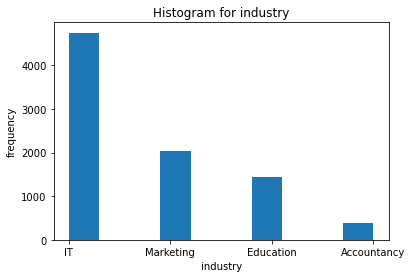

In [4]:
plt.hist(dataset['industry'])
plt.title('Histogram for industry')
plt.xlabel('industry')
plt.ylabel('frequency')
plt.show()

In [5]:
dataset['industry'].value_counts()

IT             4746
Marketing      2031
Education      1435
Accountancy     374
Name: industry, dtype: int64

In [6]:
dataset.isnull().sum()

job title    0
industry     0
dtype: int64

In [7]:
dataset.duplicated().sum()

4618

In [8]:
dataset.shape

(8586, 2)

In [9]:
dataset[dataset.duplicated()].sort_values(by='job title').head(15)

,job title,industry
1148,.net architect - asp.net microservices aws,IT
4231,.net developer,IT
1004,.net developer,IT
2142,.net developer,IT
793,.net developer,IT
2548,.net developer,IT
2199,.net developer,IT
566,.net developer,IT
4140,.net developer,IT
3522,.net developer,IT


* We notice there are many duplicates and partial duplicates in data, we will not remove them until we check the model and find they affact the accuracy 

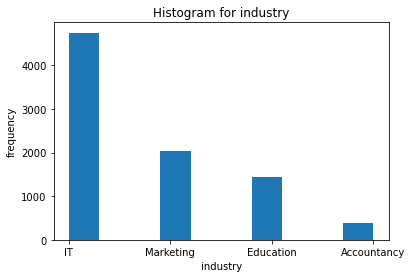

In [49]:
plt.hist(dataset['industry'])
plt.title('Histogram for industry')
plt.xlabel('industry')
plt.ylabel('frequency')
plt.show()

* We notice thare is an imbalance in dataset, we will use techniques such as oversampling or using smote if we needed that after training the model and check for results using precision and recall (Confusion Matrix)

In [11]:
#clean dataset
dataset.head()

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


In [12]:
#importing libraries for cleaning 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mostafa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#filtering data from numbers and special characters
def filter_str(words):
    return re.sub('[^a-zA-Z]',' ',words).split()

# removing the commoner morphological and inflexional endings from words in English
def filter_data(title):
    title=[ps.stem(word) for word in filter_str(title.lower()) 
            if word not in set(stopwords.words('english')) or word=='not']
    return ' '.join(title)

In [14]:
dataset['job title']=dataset['job title'].apply(lambda title:filter_data(title))

In [15]:
dataset.tail()

,job title,industry
8581,data entri clerk,Marketing
8582,content creator,Marketing
8583,sale market manag,Marketing
8584,market digit market consult,Marketing
8585,creativ copywrit arab english,Marketing


In [16]:
cleaned_dataset=dataset.copy()

In [17]:
cleaned_dataset.head()

,job title,industry
0,technic support helpdesk supervisor counti bui...,IT
1,senior technic support engin,IT
2,head servic,IT
3,js front end engin,IT
4,network telephoni control,IT


In [18]:
cleaned_dataset.shape

(8586, 2)

In [19]:
#using Term Frequency Inverse Document Frequency (TFIDF)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True)
features = vectorizer.fit_transform(cleaned_dataset['job title'].values)

df = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())


In [20]:
df['industry']=cleaned_dataset['industry'].values

In [21]:
df.head()

,aat,aberdeen,aberfoyl,abingdon,abroad,abu,aca,academ,academi,acca,...,writer,xml,xwgc,year,york,yorkshir,young,youth,youtub,industry
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT


In [22]:
df['industry'].value_counts()

IT             4746
Marketing      2031
Education      1435
Accountancy     374
Name: industry, dtype: int64

In [23]:
#encoding for target labels
target_labels={'IT':1,'Marketing':2,'Education':3,'Accountancy':4}
df['industry']=df['industry'].map(target_labels)

In [24]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [25]:
#splitting dataset into tarining set and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import *
from sklearn.model_selection import cross_val_score
clf=ExtraTreesClassifier(criterion='entropy',random_state=5)
clf.fit(train_x,train_y)
y_predict_train=clf.predict(train_x)
y_predict_test=clf.predict(test_x)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
print('Training Accuracy: ',accuracy_score(train_y,y_predict_train))
print('Testing Accuracy: ',accuracy_score(test_y,y_predict_test))

Training Accuracy:  0.983401281304601
Testing Accuracy:  0.9435389988358557


In [29]:
confusion_matrix(test_y,y_predict_test)

array([[926,  21,   2,   1],
       [ 14, 380,   8,   4],
       [  8,  22, 256,   1],
       [  8,   6,   2,  59]])

In [30]:
print(classification_report(test_y,y_predict_test))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       950
           2       0.89      0.94      0.91       406
           3       0.96      0.89      0.92       287
           4       0.91      0.79      0.84        75

    accuracy                           0.94      1718
   macro avg       0.93      0.90      0.91      1718
weighted avg       0.94      0.94      0.94      1718



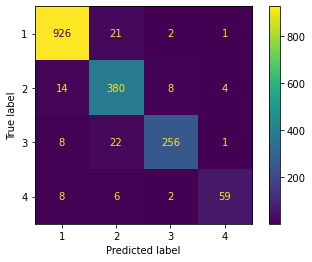

In [31]:
cm = confusion_matrix(test_y, y_predict_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

In [33]:
get_target={k:v for v,k in target_labels.items()}

In [48]:
from flask import Flask,render_template,request
 
app = Flask(__name__)
 
@app.route('/form')
def form():
    return render_template('form.html')
 
@app.route('/data/', methods = ['POST', 'GET'])
def data():
    if request.method == 'GET':
        return f"The URL /data is accessed directly. Try going to '/form' to submit form"
    if request.method == 'POST':
        dict_for_view={'Industry':get_target[clf.predict(vectorizer.transform(np.array([filter_data(request.form['title'])])).toarray())[0]]}
        form_data = dict_for_view
        return render_template('data.html',form_data = form_data)
 
if __name__ == "__main__":
    from waitress import serve
    serve(app, host="0.0.0.0", port=5007)